In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
df['Sex'] = df.Sex.map({'male':0, 'female':1})

In [8]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208
std,0.486592,0.836071,0.477990,14.526497,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


In [10]:
df.Age = df.Age.fillna(df['Age'].mean())

In [11]:
df.describe()

,Survived,Pclass,Sex,Age,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208
std,0.486592,0.836071,0.477990,13.002015,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400
50%,0.000000,3.000000,0.000000,29.699118,14.454200
75%,1.000000,3.000000,1.000000,35.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200


In [12]:
# Después de la limpieza, recién preparamos la data
data_x = df.drop('Survived', axis='columns')
data_y = df.Survived

In [15]:
# Inicializar el modelo
decission_model = DecisionTreeClassifier()

In [21]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=0.9)

In [22]:
# Entrenamos el modelo
decission_model.fit(train_x, train_y)

DecisionTreeClassifier()

In [23]:
y_predicted = decission_model.predict(test_x)

In [24]:
print(f'Score del modelo: {round(decission_model.score(test_x, test_y), 4) * 100}%')

Score del modelo: 84.44%


In [28]:
from sklearn import tree

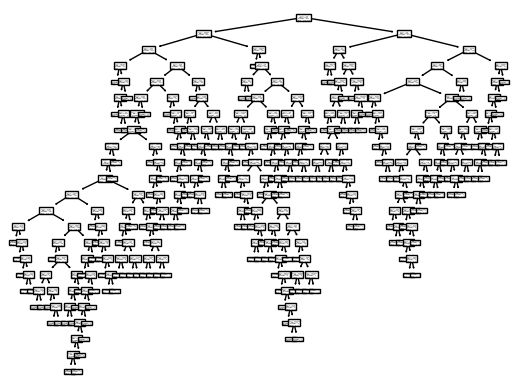

In [29]:
tree.plot_tree(decission_model)
plt.show()